<a href="https://colab.research.google.com/github/zw2791/Kaggle-practices/blob/main/data_related_jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
path = '/content/ds_salaries.csv'
df = pd.read_csv(path)

In [3]:
df.shape

(607, 12)

In [4]:
# delete the index column from data source
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
# check missing data
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## EDA

In [7]:
# see data are concentrated at which year
df['work_year'].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

Based on data, we can see demand for data related job is incresing

In [8]:
# lets see how many different job_titles we have
df['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [9]:
df['salary_currency'].value_counts()

USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
CNY      2
MXN      2
HUF      2
DKK      2
SGD      2
BRL      2
AUD      2
CLP      1
CHF      1
Name: salary_currency, dtype: int64

In [11]:
# we can see half of our data are about USA job market
# let's check what is the average salary for data analyst in USA
job_salary = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

In [12]:
# we can see salary level of all jobs
job_salary.round()

job_title
Data Analytics Lead                         405000.0
Principal Data Engineer                     328333.0
Financial Data Analyst                      275000.0
Principal Data Scientist                    215242.0
Director of Data Science                    195074.0
Data Architect                              177874.0
Applied Data Scientist                      175655.0
Analytics Engineer                          175000.0
Data Specialist                             165000.0
Head of Data                                160163.0
Machine Learning Scientist                  158412.0
Data Science Manager                        158328.0
Director of Data Engineering                156738.0
Head of Data Science                        146719.0
Applied Machine Learning Scientist          142069.0
Lead Data Engineer                          139724.0
Data Analytics Manager                      127134.0
Cloud Data Engineer                         124647.0
Data Engineering Manager            

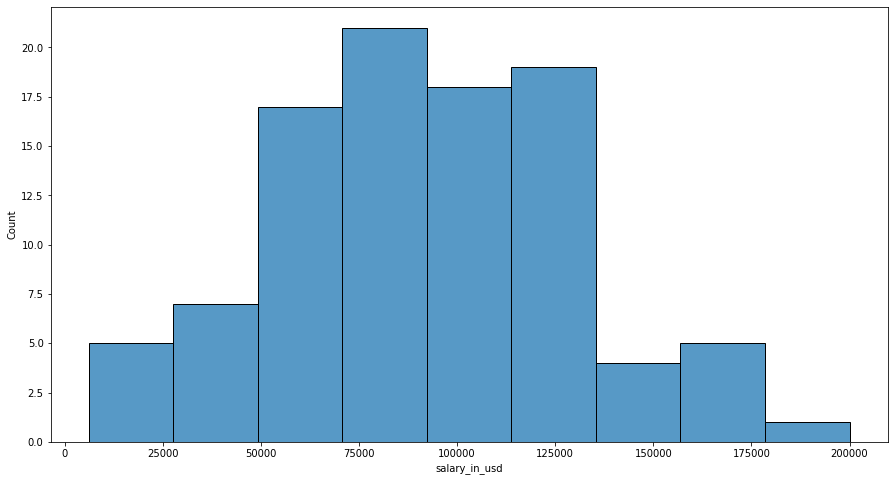

In [14]:
# now we want to know the salary distribution of data analyst job
import matplotlib.pyplot as plt
import seaborn as sns

da = df[df['job_title'] == 'Data Analyst']

plt.figure(figsize=(15,8))
ax = sns.histplot(da, x="salary_in_usd")

plt.show()

In [16]:
# let's see where do most employees live / or data came from
df['employee_residence'].value_counts().head()

US    332
GB     44
IN     30
CA     29
DE     25
Name: employee_residence, dtype: int64

In [17]:
# what are some possible values of remote ratio?
df['remote_ratio'].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

Ok, we are 100/50/0 three levels of remote work

In [18]:
# what the remote works look like?
remote100 = df[df['remote_ratio'] == 100]
remote100.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
13,2020,MI,FT,Lead Data Analyst,87000,USD,87000,US,100,US,L
14,2020,MI,FT,Data Analyst,85000,USD,85000,US,100,US,L


In [19]:
# often what size of company will need da?
df[df['job_title']=='Data Analyst'].groupby('company_size')['job_title'].count()

company_size
L    13
M    76
S     8
Name: job_title, dtype: int64

Middle size company needs da the most, but is it beacuse we have more M size companies in our data?

In [20]:
# What is the distribution of company size?
df[['company_size']].value_counts()

company_size
M               326
L               198
S                83
dtype: int64

Yes, M size company is a lot

In [ ]:
# How many experience levels?
df[['experience_level']].value_counts()

experience_level
SE                  280
MI                  213
EN                   88
EX                   26
dtype: int64

In [ ]:
da.groupby('experience_level')['job_title'].count()

experience_level
EN    12
EX     2
MI    29
SE    54
Name: job_title, dtype: int64

In [23]:
da.groupby(['work_year', 'experience_level'])['job_title'].count()

work_year  experience_level
2020       EN                   4
           MI                   3
2021       EN                   6
           MI                   7
           SE                   4
2022       EN                   2
           EX                   2
           MI                  19
           SE                  50
Name: job_title, dtype: int64

Demand for data related jobs is increasing every year, and demand are espacially high for senior and middle level data analysts based on data.